# Student Scores: EDA

# Load required Python packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/tiffanyflor/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


**Locate and print current working directory and parent directory.**

In [3]:
path = os.getcwd()
parent = os.path.dirname(path)
print(path)
print(parent)

/Users/tiffanyflor/Dropbox/MyProjects/Student Scores/notebooks
/Users/tiffanyflor/Dropbox/MyProjects/Student Scores


**Print contents of data/interim.**

In [4]:
os.listdir(parent+'/data/interim')

['cleaned_student_scores.csv']

# Load cleaned student scores into DataFrame

In [5]:
df = pd.read_csv(parent+'/data/interim/cleaned_student_scores.csv',index_col=0)

In [6]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,4,standard,0,72,72,74,218
1,female,group C,2,standard,1,69,90,88,247
2,female,group B,5,standard,0,90,95,93,278
3,male,group A,3,free/reduced,0,47,57,44,148
4,male,group C,2,standard,0,76,78,75,229


In [8]:
df.shape

(1000, 9)

In [9]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education     int64
lunch                          object
test preparation course         int64
math score                      int64
reading score                   int64
writing score                   int64
total score                     int64
dtype: object

## Convert object datatypes to categorical

In [10]:
obj_cols = ['gender','race/ethnicity','lunch']
df = df.astype({'gender':'category', 'race/ethnicity':'category', 'lunch':'category'})

In [11]:
df.dtypes

gender                         category
race/ethnicity                 category
parental level of education       int64
lunch                          category
test preparation course           int64
math score                        int64
reading score                     int64
writing score                     int64
total score                       int64
dtype: object

# Build data profile tables and plots

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parental level of education,1000.0,2.081,1.460333,0.0,1.00,2.0,3.0,5.0
test preparation course,1000.0,0.358,0.479652,0.0,0.00,0.0,1.0,1.0
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0
total score,1000.0,203.312,42.771978,27.0,175.00,205.0,233.0,300.0


In [13]:
df.describe(include=['category']).T

,count,unique,top,freq
gender,1000,2,female,518
race/ethnicity,1000,5,group C,319
lunch,1000,2,standard,645


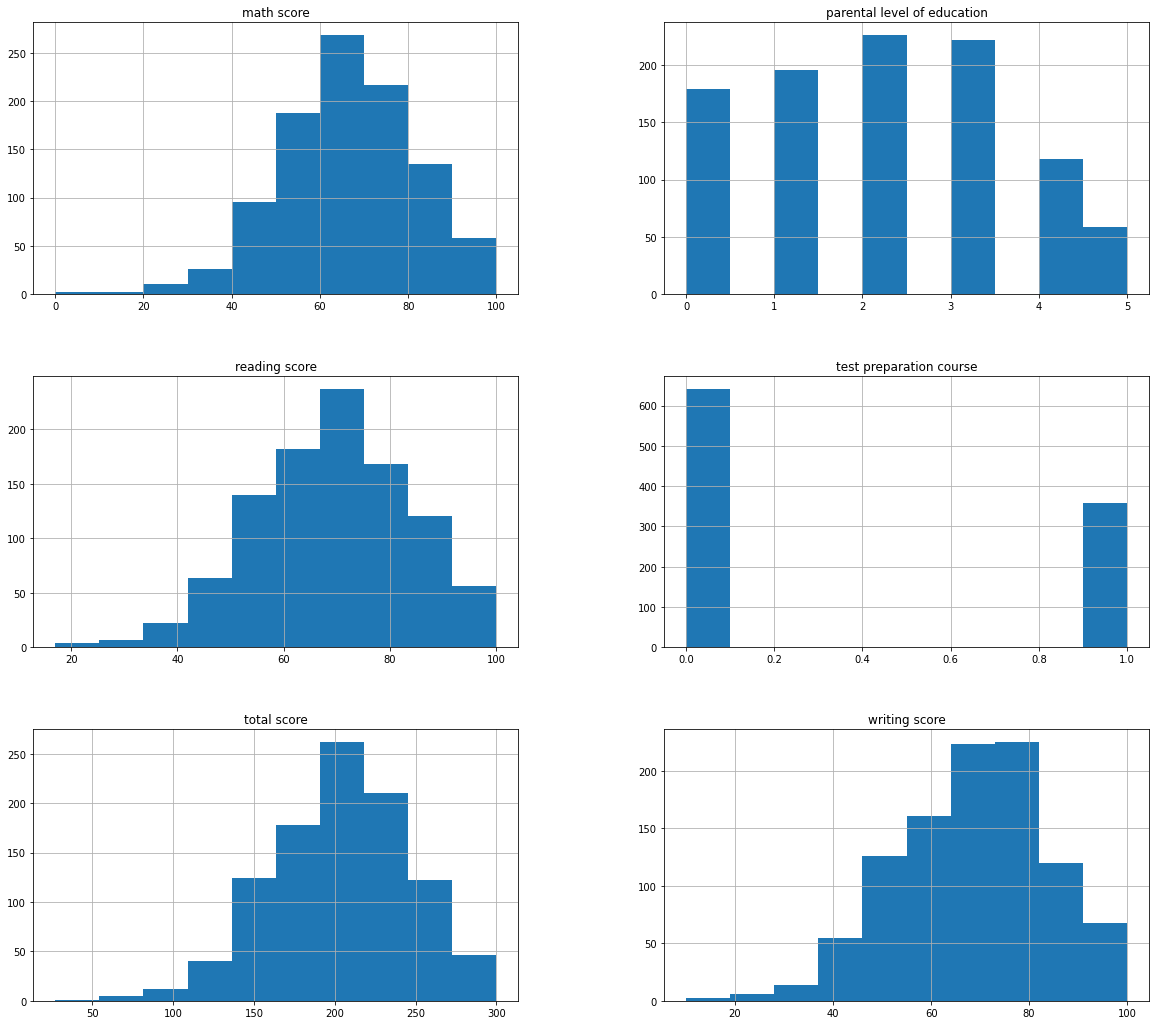

In [14]:
hist = df.hist(figsize=(20,18))

The math, reading, and writing score are contained within the total score. All columns were left in for observational purposes.

# Anamolies & Outliers

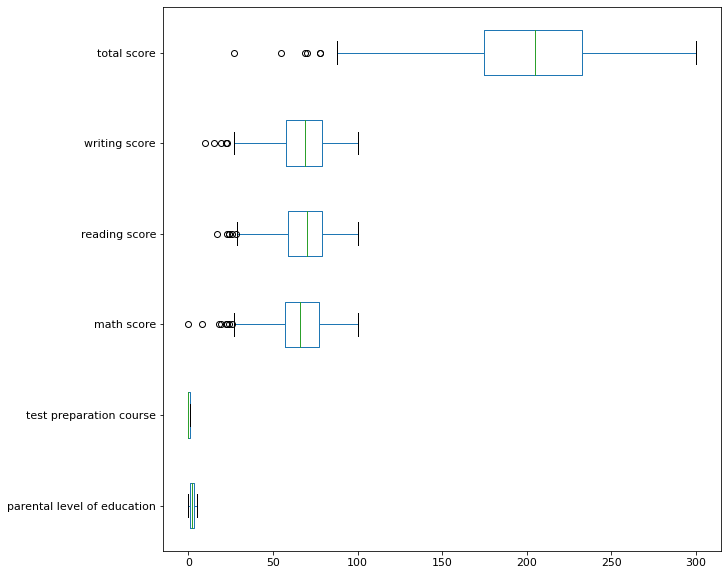

In [15]:
boxplot = df.boxplot(grid=False, vert=False, fontsize=11, figsize=(10,10))

**To predict students who may benefit from additional support, we will focus on 'total score' as our dependent variable.**

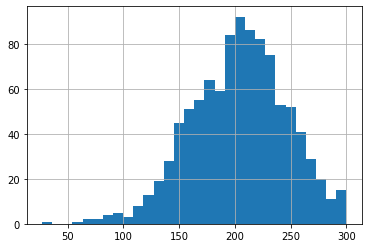

In [16]:
hist = df['total score'].hist(bins=30)

# Explore data relationships

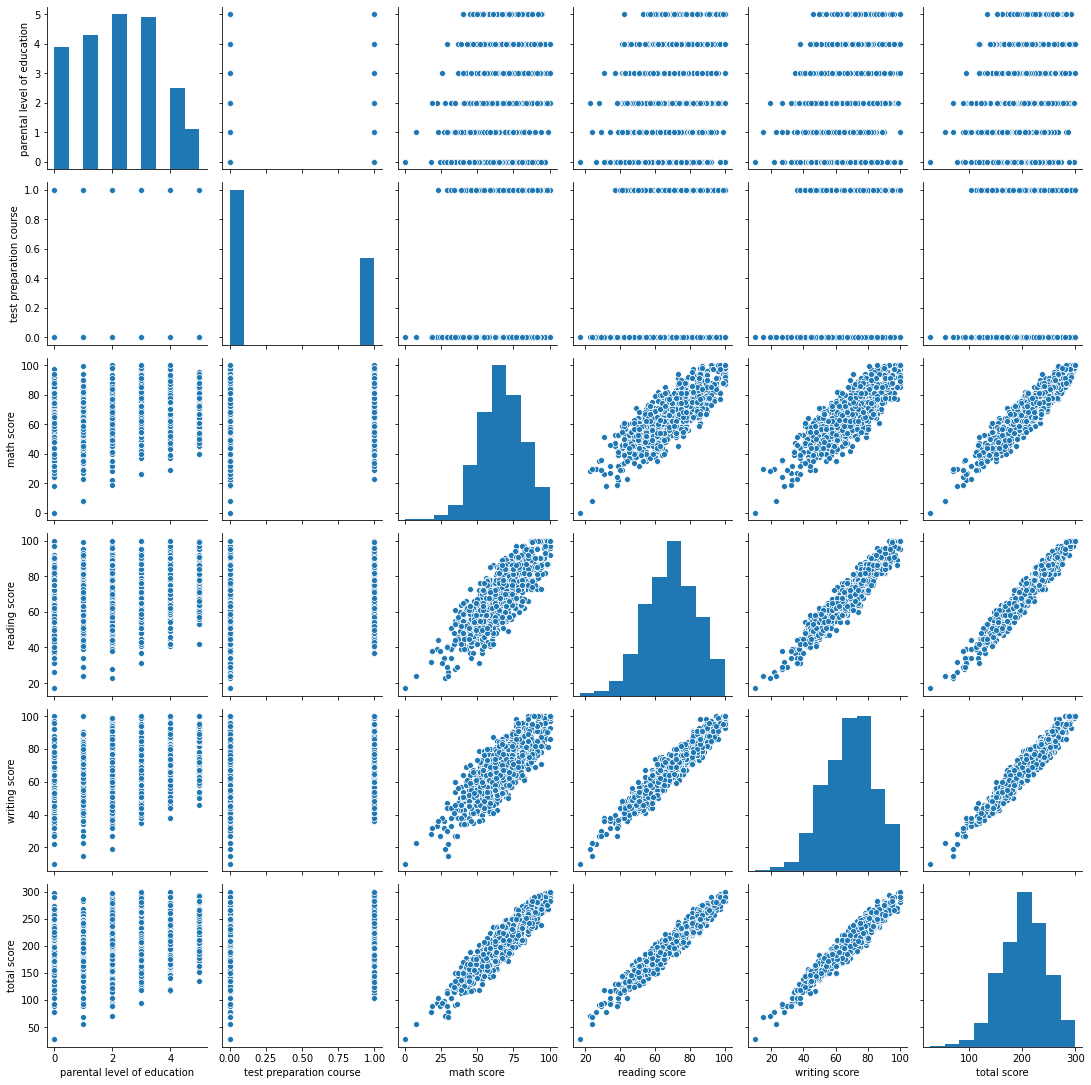

In [17]:
g = sns.pairplot(df)

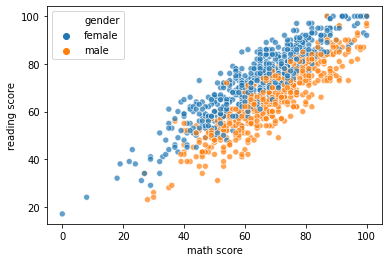

In [18]:
sns.scatterplot(x='math score',y='reading score',data=df,hue='gender',alpha=0.7)

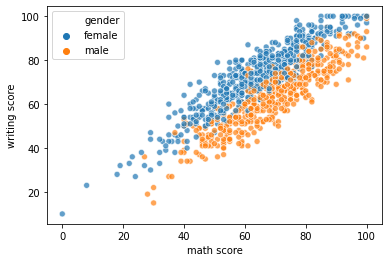

In [19]:
sns.scatterplot(x='math score',y='writing score',data=df,hue='gender',alpha=0.7)

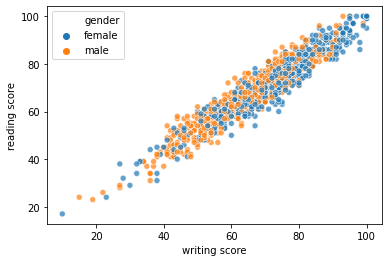

In [20]:
sns.scatterplot(x='writing score',y='reading score',data=df,hue='gender',alpha=0.7)

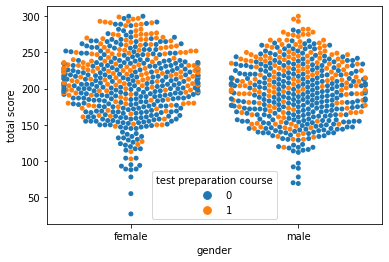

In [21]:
sns.swarmplot(x='gender',y='total score',data=df,hue='test preparation course')

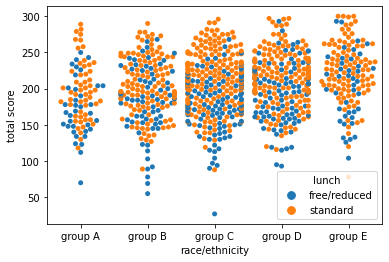

In [22]:
sns.swarmplot(x='race/ethnicity',y='total score',data=df,hue='lunch')

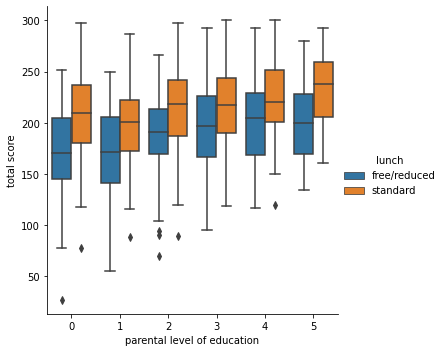

In [23]:
sns.catplot(x='parental level of education',y='total score',data=df,kind='box',hue='lunch')

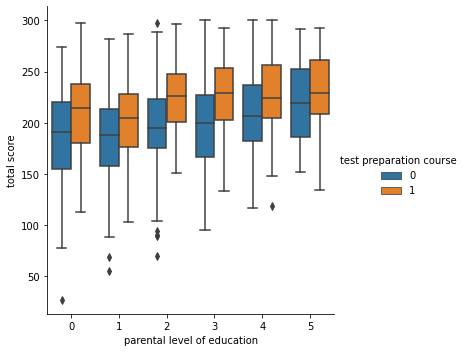

In [24]:
sns.catplot(x='parental level of education',y='total score',data=df,kind='box',hue='test preparation course')

# Identification of features

In [25]:
corr = df.corr(method='pearson')
corr.round(2).style.background_gradient(cmap='coolwarm')

,parental level of education,test preparation course,math score,reading score,writing score,total score
parental level of education,1.000000,-0.010000,0.160000,0.190000,0.240000,0.210000
test preparation course,-0.010000,1.000000,0.180000,0.240000,0.310000,0.260000
math score,0.160000,0.180000,1.000000,0.820000,0.800000,0.920000
reading score,0.190000,0.240000,0.820000,1.000000,0.950000,0.970000
writing score,0.240000,0.310000,0.800000,0.950000,1.000000,0.970000
total score,0.210000,0.260000,0.920000,0.970000,0.970000,1.000000


It's interesting to see that the test preparation course and parental level of education have a higher correlation with writing scores than with the math score. The level of parental education correlated with total score aligns with a study done by Betty Hart and Todd Risley in the mid-1980's.

According to a study, 'Children in professionals' homes were exposed to an average of more than fifteen hundred more spoken words per hour than children in welfare homes. Over one year, that amounted to a difference of nearly 8 million words, which, by age four, amounted to a total gap of 32 million words. They also found a substantial gap in tone and in the complexity of words being used. As they crunched the numbers, they discovered a direct correlation between the intensity of these early verbal experiences and later achievement.' An article by The Atlantic about this study can be found [here] (link: https://www.theatlantic.com/technology/archive/2010/03/the-32-million-word-gap/36856/).

### Remove redundant variables
When creating a model in the next couple notebooks, the total score will be the predicted variable. Due to this, all highly correlated (above 95%) features will be removed to ensure appropriate prediction using features unknown prior to the testing.

In [26]:
# Drop score-related variables, keeping total score
df = df.drop(['math score','writing score','reading score'], axis=1)

In [27]:
df.shape

(1000, 6)

## Save total student score data to new csv

In [28]:
df.to_csv(parent+'/data/interim/total_student_scores.csv')